# 그래프 생성

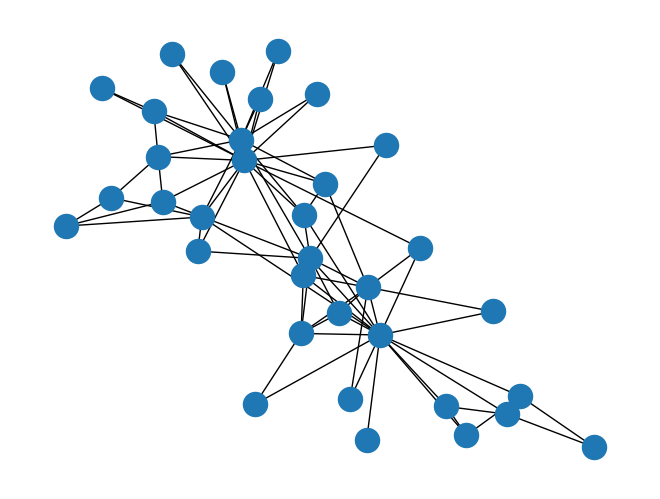

In [13]:
import networkx as nx

G = nx.karate_club_graph()  # 예제 그래프
nx.draw(G)  # 그래프 시각화

# 비음수 행렬 분해(NMF; Non-negative Matrix Factorization)

In [15]:
A = nx.to_numpy_array(G)  # 그래프 인접 행렬
print("인접 행렬 크기:", A.shape)
print("인접 행렬:\n", A)

인접 행렬 크기: (34, 34)
인접 행렬:
 [[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]


In [17]:
from sklearn.decomposition import NMF

# NMF 모델 학습
nmf = NMF(n_components=5,  # 분해할 성분 개수
          init="nndsvd",  # 초기화 방법
          max_iter=200)  # 최대 반복 횟수
W = nmf.fit_transform(A)  # 기저 행렬(W)
H = nmf.components_  # 계수 행렬(H)
print("기저 행렬(W) 크기:", W.shape)
print("계수 행렬(H) 크기:", H.shape)

기저 행렬(W) 크기: (34, 5)
계수 행렬(H) 크기: (5, 34)


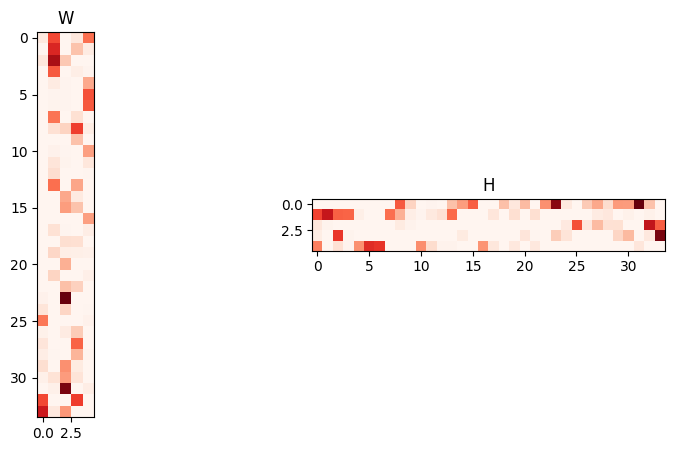

In [32]:
import matplotlib.pyplot as plt

fig, subs = plt.subplots(ncols=2, figsize=(10, 5))
# 기저 행렬(W) 시각화
subs[0].imshow(W, cmap="Reds")
subs[0].set_title("W")
# 계수 행렬(H) 시각화
subs[1].imshow(H, cmap="Reds")
subs[1].set_title("H")

plt.show()

# 특이값 분해(SVD; Singular Value Decomposition)

In [39]:
import numpy as np

U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)  # SVD
Sigma_matrix = np.diag(Sigma)

print("U 크기:", U.shape)
print("Sigma 크기:", Sigma_matrix.shape)
print("Vt 크기:", Vt.shape)

U 크기: (34, 34)
Sigma 크기: (34, 34)
Vt 크기: (34, 34)


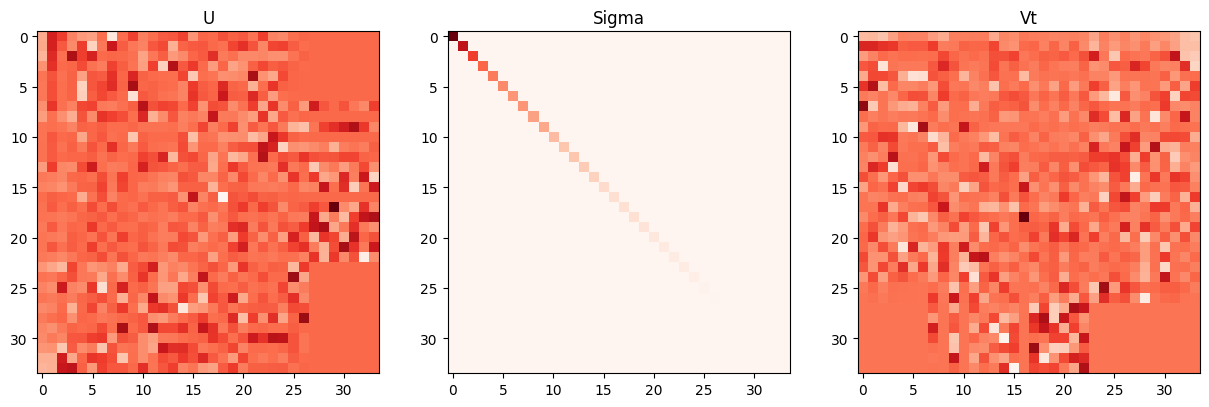

In [41]:
fig, subs = plt.subplots(ncols=3, figsize=(15, 5))
# U 시각화
subs[0].imshow(U, cmap="Reds")
subs[0].set_title("U")
# Sigma 시각화
subs[1].imshow(Sigma_matrix, cmap="Reds")
subs[1].set_title("Sigma")
# V 시각화
subs[2].imshow(Vt, cmap="Reds")
subs[2].set_title("Vt")

plt.show()

# 주성분 분석(PCA; Principal Component Analysis)

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # PCA 모델 생성
zi = pca.fit_transform(A)  # PCA 모델 학습 및 변환
u = pca.mean_  # 평균 벡터(u)
pi = pca.components_  # 주성분 벡터(pi)

print("투영 벡터(zi) 크기:", zi.shape)
print("평균 벡터(u) 크기:", u.shape)
print("주성분 벡터(pi) 크기:", pi.shape)

투영 벡터(zi) 크기: (34, 5)
평균 벡터(u) 크기: (34,)
주성분 벡터(pi) 크기: (5, 34)


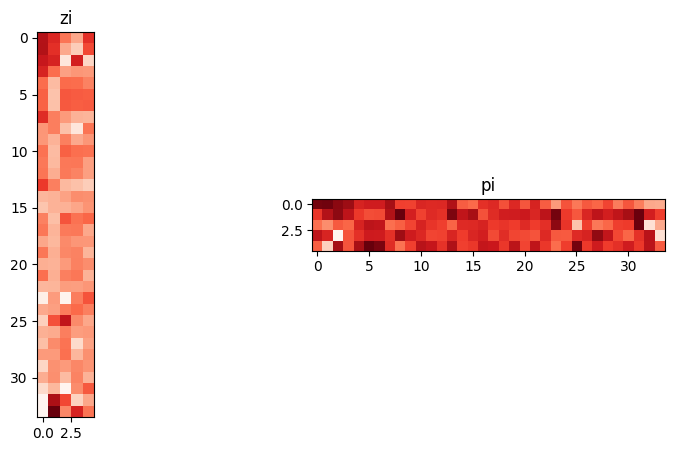

In [47]:
fig, subs = plt.subplots(ncols=2, figsize=(10, 5))
# 투영 벡터(zi) 시각화
subs[0].imshow(zi, cmap="Reds")
subs[0].set_title("zi")
# 계수 행렬(H) 시각화
subs[1].imshow(pi, cmap="Reds")
subs[1].set_title("pi")

plt.show()

---